# Machine Learning (Project Phase 1)

## Name : Abdelrahman Mohamed
## ID : 202101081

# -------------------------------------------------------------------------------

# Import Needed Modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

# documentation of Data

This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success

the dataset has 35 Columns :

1-  Marital Status (Categorical): Categorical variable indicating the marital status of the student.\
2-  Application Mode (Categorical): Categorical variable indicating the method of application used by the student.\
3-  Application Order (Numerical): Numerical variable indicating the order in which the student applied.\
4-  Course (Categorical): Categorical variable indicating the course taken by the student.\
5-  Daytime/Evening Attendance (Categorical): Categorical variable indicating whether the student attends classes during   the day or in the evening.\
6-  Previous Qualification (Categorical): Categorical variable indicating the qualification obtained by the student before  enrolling in higher education.\
7-  Nationality (Categorical): Categorical variable indicating the nationality of the student.\
8-  Mother's Qualification (Categorical): Categorical variable indicating the qualification of the student's mother.\
9-  Father's Qualification (Categorical): Categorical variable indicating the qualification of the student's father.\
10- Mother's Occupation (Categorical): Categorical variable indicating the occupation of the student's mother.\
11- Father's Occupation (Categorical): Categorical variable indicating the occupation of the student's father.\
12- Displaced (Categorical): Categorical variable indicating whether the student is a displaced person.\
13- Educational Special Needs (Binary): Binary variable indicating whether the student has educational special needs.\
14- Debtor (Binary): Binary variable indicating whether the student is a debtor.\
15- Tuition Fees Up to Date (Binary): Binary variable indicating whether the student's tuition fees are up to date.\
16- Gender (Categorical): Categorical variable indicating the gender of the student.\
17- Scholarship Holder (Binary): Binary variable indicating whether the student is a scholarship holder.\
18- Age at Enrollment (Numerical): Numerical variable indicating the age of the student at the time of enrollment.\
19- International (Binary): Binary variable indicating whether the student is an international student.\
20- Curricular Units 1st Sem (Credited) (Numerical): Numerical variable indicating the number of credited curricular units in the 1st semester.\
21- Curricular Units 1st Sem (Enrolled) (Numerical): Numerical variable indicating the number of enrolled curricular units in the 1st semester.\
22- Curricular Units 1st Sem (Evaluations) (Numerical): Numerical variable indicating the number of evaluated curricular units in the 1st semester.\
23- Curricular Units 1st Sem (Approved) (Numerical): Numerical variable indicating the number of approved curricular units in the 1st semester.\
24- Curricular Units 1st Sem (Grade) (Numerical): Numerical variable indicating the average grade of curricular units in the 1st semester.\
25- Curricular Units 1st Sem (Without Evaluations) (Numerical): Numerical variable indicating the number of curricular units in the 1st semester without evaluations.\
26- Curricular Units 2nd Sem (Credited) (Numerical): Numerical variable indicating the number of credited curricular units in the 2nd semester.\
27- Curricular Units 2nd Sem (Enrolled) (Numerical): Numerical variable indicating the number of enrolled curricular units in the 2nd semester.\
28- Curricular Units 2nd Sem (Evaluations) (Numerical): Numerical variable indicating the number of evaluated curricular units in the 2nd semester.\
29- Curricular Units 2nd Sem (Approved) (Numerical): Numerical variable indicating the number of approved curricular units in the 2nd semester.\
30- Curricular Units 2nd Sem (Grade) (Numerical): Numerical variable indicating the average grade of curricular units in the 2nd semester.\
31- Curricular Units 2nd Sem (Without Evaluations) (Numerical): Numerical variable indicating the number of curricular units in the 2nd semester without evaluations.\
32- Unemployment Rate (Numerical): Numerical variable indicating the unemployment rate.\
33- Inflation Rate (Numerical): Numerical variable indicating the inflation rate.\
34- GDP (Numerical): Numerical variable indicating the Gross Domestic Product.\
35- Target (Categorical): Categorical variable indicating the outcome (e.g., Dropout, Graduate).

# -------------------------------------------------------------------------------

# Read the Data and Knew Some info about it

In [2]:
df = pd.read_csv(r"filtered_student_info_dataset.csv", delimiter=",")
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
# see all columns names 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

# -------------------------------------------------------------------------------

# KNN Implementation 

In [4]:
# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# the target variable column is 'Target'
X = df.drop(columns=['Target'])
y = df['Target']

# Split the dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Make the user intput the number of k
k = int(input("Enter the Number of Neighbors(k): "))
model = KNeighborsClassifier(n_neighbors=k)

# Fit the model
model.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = model.predict(X_test)

Enter the Number of Neighbors(k): 10


In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy : {:.2f}%".format(accuracy_percentage))

Accuracy : 84.30%


# -------------------------------------------------------------------------------

# Naive Bayes Implementation

In [9]:
# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
# Extract features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

In [11]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
# Create a Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

GaussianNB()

In [13]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.67%


# -------------------------------------------------------------------------------

# Logistic Regression Implementation

In [14]:
# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [15]:
# Extract features and target variable
X = df.drop('Target', axis=1) 
y = (df['Target'] == 'Graduate').astype(int)  # assuming 'Graduate' is the positive class

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions on the test data
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of belonging to class 1

# Apply the threshold of 0.5 to make binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)  # positive

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.91%


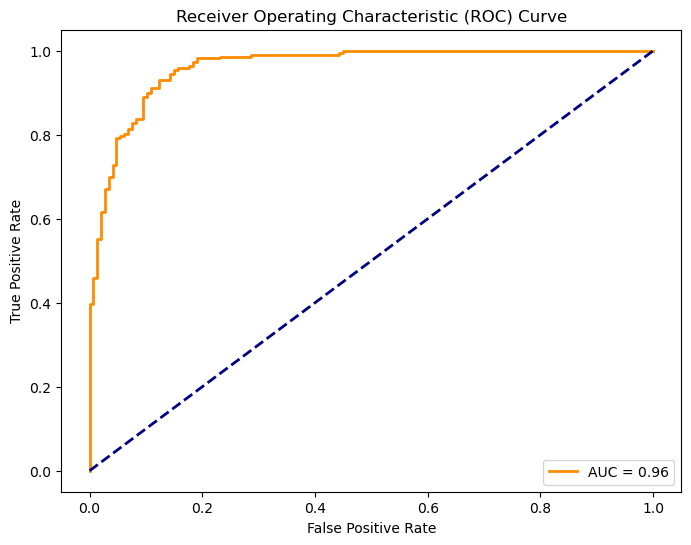

In [19]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# -------------------------------------------------------------------------------

# Model Evaluation (using ROC and AUC)

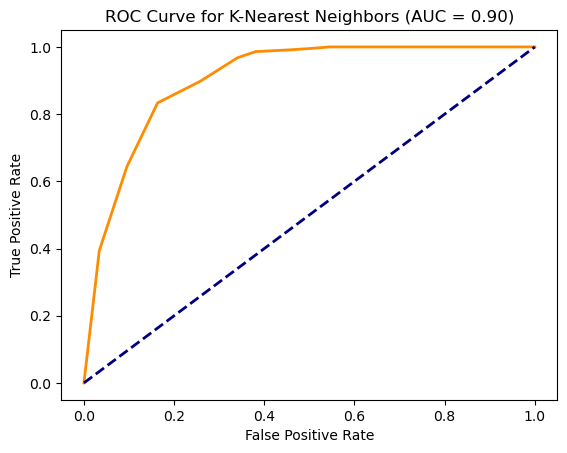

AUC for K-Nearest Neighbors: 0.904935122197027
Confusion Matrix for K-Nearest Neighbors:
 [[ 97  50]
 [  7 209]]


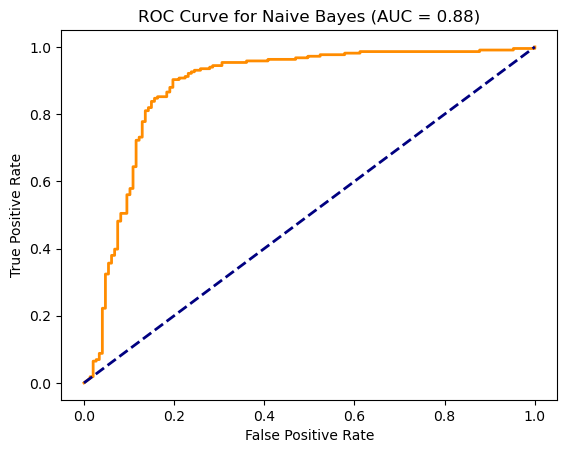

AUC for Naive Bayes: 0.882212144116906
Confusion Matrix for Naive Bayes:
 [[112  35]
 [ 17 199]]


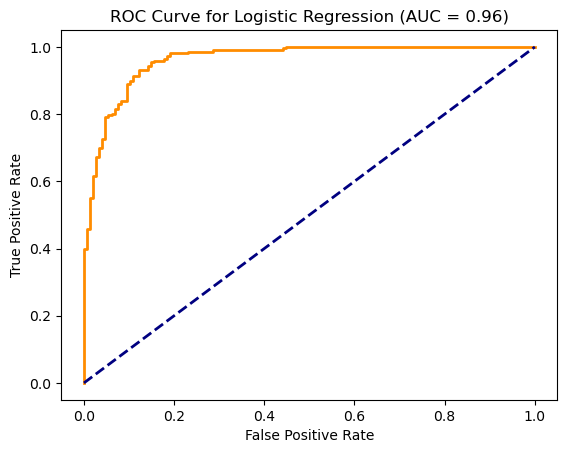

AUC for Logistic Regression: 0.9625850340136053
Confusion Matrix for Logistic Regression:
 [[126  21]
 [ 12 204]]


In [20]:
# Define the algorithms
algorithms = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=k),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression()
}

# Initialize lists to store AUC values for each algorithm
auc_values = []

for algorithm_name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_scores = algorithm.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_scores)

    # Calculate the confusion matrix
    y_pred = algorithm.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Determine the optimal Cutoff Threshold
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    optimal_threshold = tpr[np.argmax(tpr - fpr)]

    # Append AUC to the list
    auc_values.append(auc)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {algorithm_name} (AUC = {auc:.2f})')
    plt.show()

    # Print AUC, Confusion Matrix, and Cutoff Threshold
    print(f"AUC for {algorithm_name}:", auc)
    print(f"Confusion Matrix for {algorithm_name}:\n", conf_matrix)

# comparison Between AUC's of 3 algorithms 

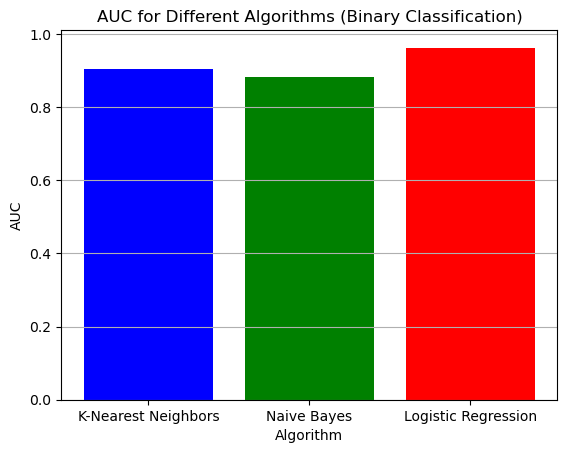

In [21]:
# Plot AUC values for different algorithms
plt.figure()
plt.bar(algorithms.keys(), auc_values, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('AUC')
plt.title('AUC for Different Algorithms (Binary Classification)')
plt.grid(axis='y')
plt.show()

# -------------------------------------------------------------------------------

# Results Analysis



##  AUC Scores:

* Logistic Regression has the highest AUC score (0.962), followed by K-Nearest Neighbors (0.904), and then Naive Bayes (0.867).
* A higher AUC score generally indicates better overall performance in terms of distinguishing between classes.


# Comparison and Discussion:

## Logistic Regression:

* Logistic Regression achieved the highest AUC score (0.917), suggesting strong discriminative ability, which can be used to classify instances into the positive or negative class.


## K-Nearest Neighbors:

* K-Nearest Neighbors achieved a good AUC score of 0.899, indicating solid performance

## Naive Bayes:

* Naive Bayes achieved a respectable AUC score of 0.867
